In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

C:\Users\grkmy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_1 = pd.read_excel("Datathon@MetuStatClub Final.xlsx",sheet_name = "Alım Davranışı Takip")

In [3]:
df_1.head()

,Company,Brand,Kategori,Metric Type,Metric,2020 Ocak,2020 Subat,2020 Mart,2020 Nisan,2020 Mayıs,...,2022 Mart,2022 Nisan,2022 Mayıs,2022 Haziran,2022 Temmuz,2022 Agustos,2022 Eylül,2022 Ekim,2022 Kasım,2022 Aralık
0,TOTAL,TOTAL,TOTAL,Behavior,Penetration,21949946,21987271,21996667,22037014,22045181,...,22798161,22863279,22875601,22876450,22950789,23088112,23163429,23221987,23279264,23371972
1,Prizy,Y,1,Brand,TOM,12,11,12,13,11,...,10,16,17,12,9,7,7,7,9,9
2,Prizy,Y,1,Brand,Spontaneous Awareness,33,35,29,25,23,...,20,27,29,23,20,20,20,20,23,25
3,Prizy,Y,1,Brand,Awareness,94,94,91,92,93,...,89,91,92,89,87,87,87,86,88,86
4,Prizy,Y,1,Brand,Consideration,93,93,90,90,93,...,86,90,91,87,86,85,84,84,86,86


In [4]:
df_2 = pd.read_excel("Datathon@MetuStatClub Final.xlsx",sheet_name = "Reklam Test Araştırması")

In [5]:
df_1[(df_1["Company"] == "Prizy") & (df_1["Brand"] == "Y")]

,Company,Brand,Kategori,Metric Type,Metric,2020 Ocak,2020 Subat,2020 Mart,2020 Nisan,2020 Mayıs,...,2022 Mart,2022 Nisan,2022 Mayıs,2022 Haziran,2022 Temmuz,2022 Agustos,2022 Eylül,2022 Ekim,2022 Kasım,2022 Aralık
1,Prizy,Y,1,Brand,TOM,12,11,12,13,11,...,10,16,17,12,9,7,7,7,9,9
2,Prizy,Y,1,Brand,Spontaneous Awareness,33,35,29,25,23,...,20,27,29,23,20,20,20,20,23,25
3,Prizy,Y,1,Brand,Awareness,94,94,91,92,93,...,89,91,92,89,87,87,87,86,88,86
4,Prizy,Y,1,Brand,Consideration,93,93,90,90,93,...,86,90,91,87,86,85,84,84,86,86
5,Prizy,Y,1,Brand,Ever Used,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Prizy,Y,1,Brand,Trial,64,67,64,68,69,...,65,70,69,64,64,63,58,59,64,66
7,Prizy,Y,1,Brand,Repurchase,43,45,45,49,48,...,46,50,49,45,47,44,40,42,49,50
8,Prizy,Y,1,Brand,Most Often,16,20,24,22,22,...,26,27,27,25,22,19,18,22,27,26
9,Prizy,Y,1,Brand,Performance,47,52,53,57,60,...,41,53,60,53,53,53,52,54,59,62
10,Prizy,Y,1,Brand,Yakınlık,59,60,57,57,60,...,41,51,59,54,54,55,55,54,58,61


In [6]:
df_1["Company_Brand"] = df_1["Company"] + "_" + df_1["Brand"]
df_1 = df_1[~df_1.isin(["X-i","X-ii","Y-i","Y-ii","Y-iii","A-i","A-ii"]).any(axis=1)]
df_1 = df_1.replace("-",0)

### Different Time Periods and average values for each company_brand (3 months - 6 months - 12 months)

In [7]:
df_1[df_1["Company_Brand"] == "Prizy_Y"].loc[4:]

,Company,Brand,Kategori,Metric Type,Metric,2020 Ocak,2020 Subat,2020 Mart,2020 Nisan,2020 Mayıs,...,2022 Nisan,2022 Mayıs,2022 Haziran,2022 Temmuz,2022 Agustos,2022 Eylül,2022 Ekim,2022 Kasım,2022 Aralık,Company_Brand
4,Prizy,Y,1,Brand,Consideration,93.00,93.00,90.00,90.00,93.00,...,90.00,91.00,87.00,86.00,85.00,84.00,84.00,86.00,86.00,Prizy_Y
5,Prizy,Y,1,Brand,Ever Used,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prizy_Y
6,Prizy,Y,1,Brand,Trial,64.00,67.00,64.00,68.00,69.00,...,70.00,69.00,64.00,64.00,63.00,58.00,59.00,64.00,66.00,Prizy_Y
7,Prizy,Y,1,Brand,Repurchase,43.00,45.00,45.00,49.00,48.00,...,50.00,49.00,45.00,47.00,44.00,40.00,42.00,49.00,50.00,Prizy_Y
8,Prizy,Y,1,Brand,Most Often,16.00,20.00,24.00,22.00,22.00,...,27.00,27.00,25.00,22.00,19.00,18.00,22.00,27.00,26.00,Prizy_Y
9,Prizy,Y,1,Brand,Performance,47.00,52.00,53.00,57.00,60.00,...,53.00,60.00,53.00,53.00,53.00,52.00,54.00,59.00,62.00,Prizy_Y
10,Prizy,Y,1,Brand,Yakınlık,59.00,60.00,57.00,57.00,60.00,...,51.00,59.00,54.00,54.00,55.00,55.00,54.00,58.00,61.00,Prizy_Y
11,Prizy,Y,1,Behavior,Penetration,557665.42,536966.85,583536.55,537879.80,491009.51,...,864689.09,747994.48,639404.91,526369.58,603466.77,728401.74,918906.75,1344561.09,1123631.28,Prizy_Y
12,Prizy,Y,1,Behavior,REPEATER Rate,13.54,14.15,12.21,17.34,14.77,...,9.76,14.38,14.35,15.23,12.68,8.91,12.66,14.62,10.49,Prizy_Y
13,Prizy,Y,1,Behavior,Volume (gr),70095489.42,65291801.94,72186531.81,73802854.84,69213720.82,...,96355000.48,64411453.24,61178191.51,46491617.68,61446381.34,60997574.59,89459352.43,166691835.06,97631151.67,Prizy_Y


In [8]:
df = df_1.drop("Company_Brand", axis = 1)

In [9]:
transform_numer_columns = df.columns[5:]
df[transform_numer_columns]=df[transform_numer_columns].astype("float64")

In [10]:
a = []
bolum = 3
range_ = 36/bolum
for i in range(0,int(range_)):
    data_to_append = pd.DataFrame(df.iloc[:,3*i+5:3*i+5+3].mean(axis=1).to_frame())
    string_of_ceyreklik = f"{((i+1)*3)/3}. Çeyreklik"
    data_to_append.rename(columns = {0:string_of_ceyreklik}, inplace = True)
    a.append(data_to_append)
quartile = pd.concat(a,axis=1)
df_3_months = quartile

In [11]:
df_3_months

,1.0. Çeyreklik,2.0. Çeyreklik,3.0. Çeyreklik,4.0. Çeyreklik,5.0. Çeyreklik,6.0. Çeyreklik,7.0. Çeyreklik,8.0. Çeyreklik,9.0. Çeyreklik,10.0. Çeyreklik,11.0. Çeyreklik,12.0. Çeyreklik
0,21977961.33,22058657.33,22159400.00,22265049.33,22354367.67,22443036.33,22564165.00,22673104.33,22766805.67,22871776.67,23067443.33,23291074.33
1,11.67,11.67,12.00,11.00,9.67,9.33,9.67,9.67,9.67,15.00,7.67,8.33
2,32.33,23.33,24.33,21.00,21.00,20.33,21.00,22.67,22.33,26.33,20.00,22.67
3,93.00,92.33,92.33,91.67,91.33,90.67,90.00,90.67,90.33,90.67,87.00,86.67
4,92.00,91.00,91.33,90.33,90.00,88.67,88.67,89.00,87.67,89.33,85.00,85.33
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1.35,1.33,1.29,1.34,1.32,1.30,1.28,1.31,1.31,1.24,1.22,1.27
1546,528.51,573.55,495.99,530.42,525.82,555.47,506.07,507.45,501.89,485.27,456.03,483.63
1547,3.82,4.42,4.11,4.65,4.85,5.40,5.31,5.83,8.38,10.54,11.94,16.12
1548,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.03


In [12]:
df_concat = pd.concat([df[df.columns[:5]], df_3_months], axis=1)
df_3_months = df_concat
df_3_months["Company_Brand"] = df_3_months["Company"] + "_" + df_3_months["Brand"]
last_col = df_3_months.iloc[:, -1]
df_3_months = df_3_months.iloc[:, :-1]
df_3_months.insert(loc=0, column=last_col.name, value=last_col)
df_3_months = df_3_months.drop(["Company","Brand"],axis = 1)
df_3_months

,Company_Brand,Kategori,Metric Type,Metric,1.0. Çeyreklik,2.0. Çeyreklik,3.0. Çeyreklik,4.0. Çeyreklik,5.0. Çeyreklik,6.0. Çeyreklik,7.0. Çeyreklik,8.0. Çeyreklik,9.0. Çeyreklik,10.0. Çeyreklik,11.0. Çeyreklik,12.0. Çeyreklik
0,TOTAL_TOTAL,TOTAL,Behavior,Penetration,21977961.33,22058657.33,22159400.00,22265049.33,22354367.67,22443036.33,22564165.00,22673104.33,22766805.67,22871776.67,23067443.33,23291074.33
1,Prizy_Y,1,Brand,TOM,11.67,11.67,12.00,11.00,9.67,9.33,9.67,9.67,9.67,15.00,7.67,8.33
2,Prizy_Y,1,Brand,Spontaneous Awareness,32.33,23.33,24.33,21.00,21.00,20.33,21.00,22.67,22.33,26.33,20.00,22.67
3,Prizy_Y,1,Brand,Awareness,93.00,92.33,92.33,91.67,91.33,90.67,90.00,90.67,90.33,90.67,87.00,86.67
4,Prizy_Y,1,Brand,Consideration,92.00,91.00,91.33,90.33,90.00,88.67,88.67,89.00,87.67,89.33,85.00,85.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,DLZ_DLZ,4,Behavior,PF (times),1.35,1.33,1.29,1.34,1.32,1.30,1.28,1.31,1.31,1.24,1.22,1.27
1546,DLZ_DLZ,4,Behavior,TS (gr),528.51,573.55,495.99,530.42,525.82,555.47,506.07,507.45,501.89,485.27,456.03,483.63
1547,DLZ_DLZ,4,Behavior,TV (tl),3.82,4.42,4.11,4.65,4.85,5.40,5.31,5.83,8.38,10.54,11.94,16.12
1548,DLZ_DLZ,4,Behavior,Price (gr/tl),0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.03


In [13]:
volume = df_3_months[(df_3_months["Kategori"] == 1) & (df_3_months["Metric"] == "Volume (gr)")]
market_volume = []
for i in volume.columns[4:]:
    market_volume.append(volume[i][13] / volume[i].sum())
    
price = df_3_months[(df_3_months["Kategori"] == 1) & (df_3_months["Metric"] == "Price (gr/tl)")]
market_price = []
for i in price.columns[4:]:
    market_price.append(price[i][20] / price[i].sum())
    
tom = df_3_months[(df_3_months["Kategori"] == 1) & (df_3_months["Metric"] == "TOM")]
market_tom = []
for i in tom.columns[4:]:
    market_tom.append(tom[i][1] / tom[i].sum())

spa = df_3_months[(df_3_months["Kategori"] == 1) & (df_3_months["Metric"] == "Spontaneous Awareness")]
market_spa = []
for i in spa.columns[4:]:
    market_spa.append(spa[i][2] / spa[i].sum())

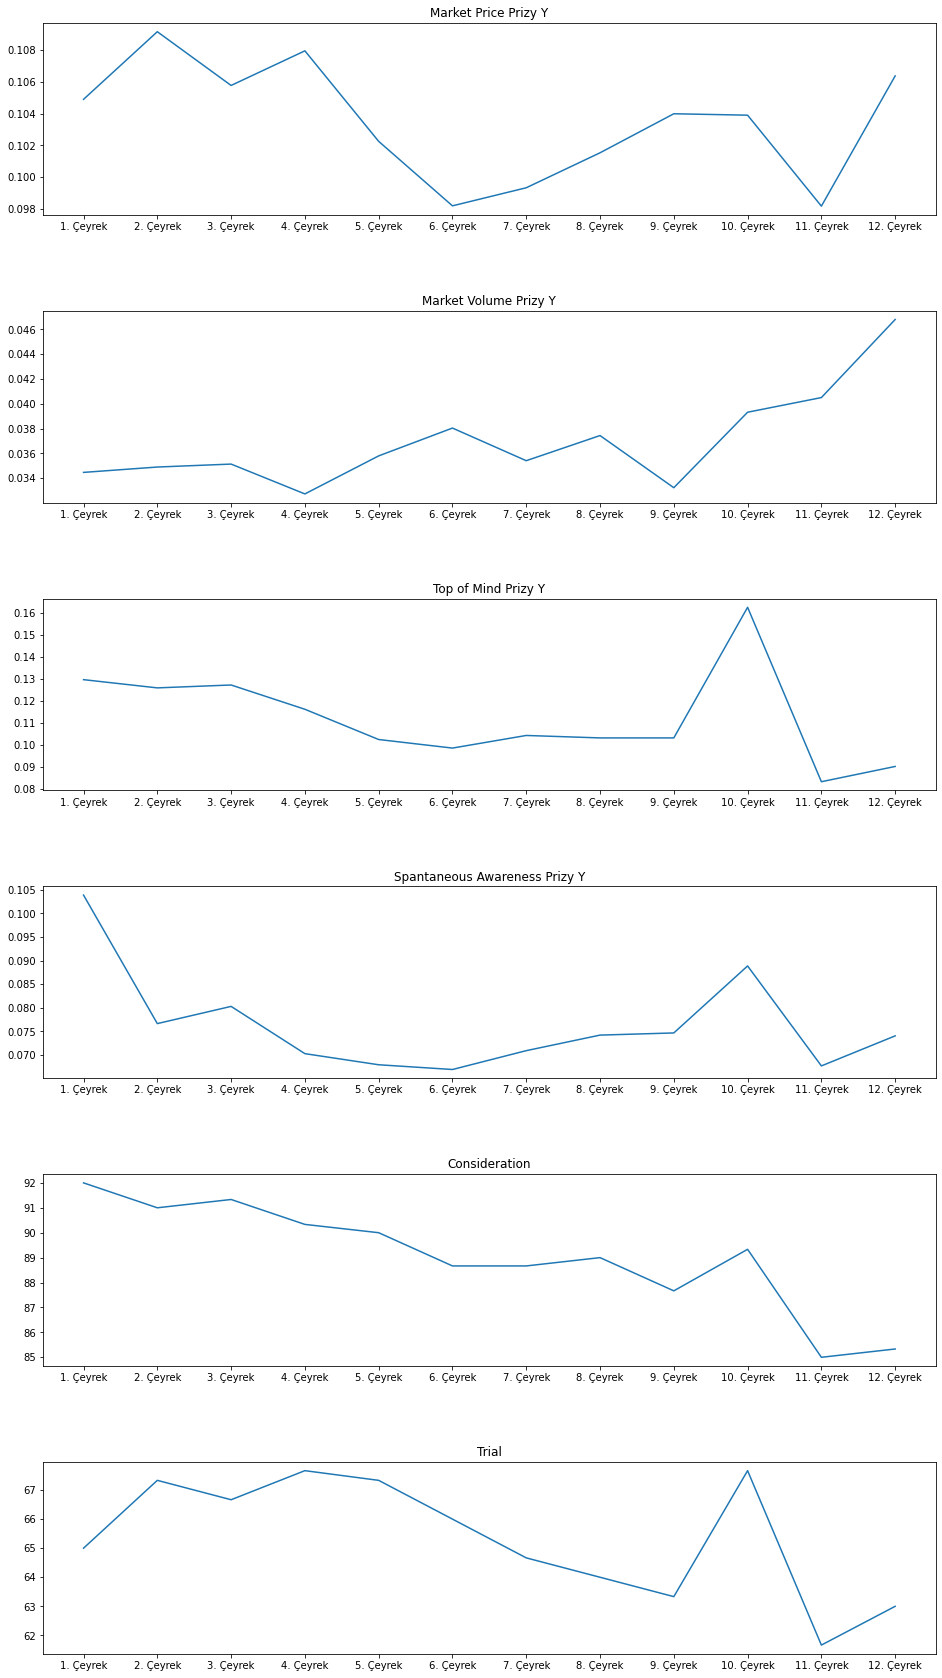

In [14]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(16, 30))
fig.subplots_adjust(hspace=0.5) 
x = []
for i in range(1,13):
    x.append(f"{i}. Çeyrek")
axs[0].plot(x, market_price)
axs[0].set_title("Market Price Prizy Y")
axs[1].plot(x, market_volume)
axs[1].set_title("Market Volume Prizy Y")
axs[2].plot(x, market_tom)
axs[2].set_title("Top of Mind Prizy Y")
axs[3].plot(x, market_spa)
axs[3].set_title("Spantaneous Awareness Prizy Y")
axs[4].plot(x, df_3_months.loc[4][4:].values)
axs[4].set_title("Consideration")
axs[5].plot(x, df_3_months.loc[6][4:].values)
axs[5].set_title("Trial")

plt.show()

#### 10. çeyrekte göze çarpan trendi kıran bir hareket var bunun sebeplerini inceleyelim ve pazarın genel olarak 10. çeyrekteki durumuna bakalım.

In [15]:
df_rank_start = df_3_months[(df_3_months["Metric"] == "Volume (gr)") & (df_3_months["Kategori"] == 1)][["Company_Brand","1.0. Çeyreklik"]].sort_values(by="1.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]
df_rank_end = df_3_months[(df_3_months["Metric"] == "Volume (gr)") & (df_3_months["Kategori"] == 1)][["Company_Brand","12.0. Çeyreklik"]].sort_values(by="12.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]

In [16]:
print("Prizy Y ürünü,1. çeyrekte, 1. Kategorideki Volume değerlerinde {} ürün arasında {}. sırada".format(len(df_rank_start),df_rank_start[df_rank_start["Company_Brand"]=="Prizy_Y"].index[0] + 1))
print("Prizy Y ürünü,12. çeyrekte, 1. Kategorideki Volume değerlerinde {} ürün arasında {}. sırada".format(len(df_rank_end),df_rank_end[df_rank_end["Company_Brand"]=="Prizy_Y"].index[0] + 1))

Prizy Y ürünü,1. çeyrekte, 1. Kategorideki Volume değerlerinde 12 ürün arasında 7. sırada
Prizy Y ürünü,12. çeyrekte, 1. Kategorideki Volume değerlerinde 12 ürün arasında 7. sırada


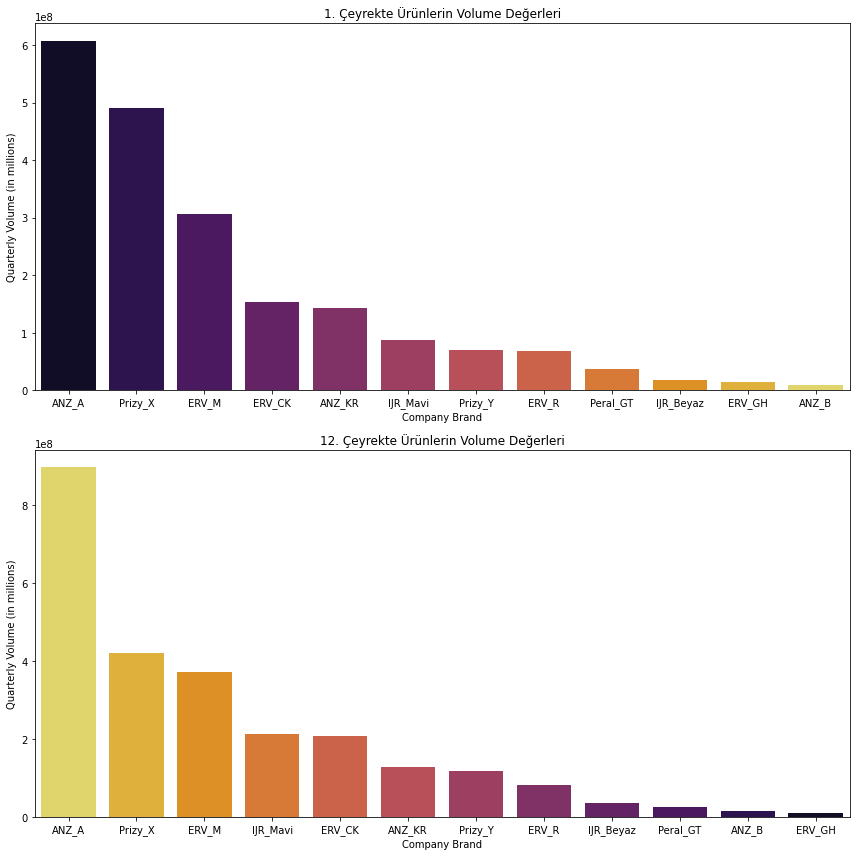

In [17]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 12))

sns.barplot(ax=axs[0], x="Company_Brand", y="1.0. Çeyreklik", data=df_rank_start, palette="inferno")
axs[0].set_title("1. Çeyrekte Ürünlerin Volume Değerleri")
axs[0].set_xlabel("Company Brand")
axs[0].set_ylabel("Quarterly Volume (in millions)")

sns.barplot(ax=axs[1], x="Company_Brand", y="12.0. Çeyreklik", data=df_rank_end, palette="inferno_r")
axs[1].set_title("12. Çeyrekte Ürünlerin Volume Değerleri")
axs[1].set_xlabel("Company Brand")
axs[1].set_ylabel("Quarterly Volume (in millions)")

plt.tight_layout()
plt.show()

In [18]:
print("""
2020 Ocak - 2022 Aralık tarihleri arasında 1. Kategorideki ürünlerin ortalama 
Volume değerlerinde {}'lik bir değişim yaşandı.
    """.format(df_rank_end["12.0. Çeyreklik"].mean() - df_rank_start["1.0. Çeyreklik"].mean()))

print("""
Prizy X ürününün Volume değeri 2020 Ocak tarihinden 
2022 Aralık tarihine kadar {} değerinde bir değişim gösterdi.
    """.format(df_rank_end[df_rank_end["Company_Brand"] == "Prizy_X"]["12.0. Çeyreklik"].values[0] - df_rank_start[df_rank_start["Company_Brand"] == "Prizy_X"]["1.0. Çeyreklik"].values[0]))

print("""
Prizy Y ürününün Volume değeri 2020 Ocak tarihinden
2022 Aralık tarihine kadar {} değerinde bir değişim gösterdi.
    """.format(df_rank_end[df_rank_end["Company_Brand"] == "Prizy_Y"]["12.0. Çeyreklik"].values[0] - df_rank_start[df_rank_start["Company_Brand"] == "Prizy_Y"]["1.0. Çeyreklik"].values[0]))

df_diff = df_rank_end["12.0. Çeyreklik"] - df_rank_start["1.0. Çeyreklik"]
print("""
Ürünlerin Volume değerlerinin 2020 Ocak - 2022 Aralık tarihine kadar olan değişimlerinin standart sapması = {}
""".format(df_diff.std()))


2020 Ocak - 2022 Aralık tarihleri arasında 1. Kategorideki ürünlerin ortalama 
Volume değerlerinde 42704688.408587396'lik bir değişim yaşandı.
    

Prizy X ürününün Volume değeri 2020 Ocak tarihinden 
2022 Aralık tarihine kadar -70298434.90741038 değerinde bir değişim gösterdi.
    

Prizy Y ürününün Volume değeri 2020 Ocak tarihinden
2022 Aralık tarihine kadar 48736172.00034967 değerinde bir değişim gösterdi.
    

Ürünlerin Volume değerlerinin 2020 Ocak - 2022 Aralık tarihine kadar olan değişimlerinin standart sapması = 86215637.94687757



In [19]:
df_rank_start_TOM = df_3_months[(df_3_months["Metric"] == "TOM") & (df_3_months["Kategori"] == 1)][["Company_Brand","1.0. Çeyreklik"]].sort_values(by="1.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]
df_rank_end_TOM = df_3_months[(df_3_months["Metric"] == "TOM") & (df_3_months["Kategori"] == 1)][["Company_Brand","12.0. Çeyreklik"]].sort_values(by="12.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]

df_rank_start_trial = df_3_months[(df_3_months["Metric"] == "Trial") & (df_3_months["Kategori"] == 1)][["Company_Brand","1.0. Çeyreklik"]].sort_values(by="1.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]
df_rank_end_trial = df_3_months[(df_3_months["Metric"] == "Trial") & (df_3_months["Kategori"] == 1)][["Company_Brand","12.0. Çeyreklik"]].sort_values(by="12.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]

df_rank_start_mostoften = df_3_months[(df_3_months["Metric"] == "Most Often") & (df_3_months["Kategori"] == 1)][["Company_Brand","1.0. Çeyreklik"]].sort_values(by="1.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]
df_rank_end_mostoften = df_3_months[(df_3_months["Metric"] == "Most Often") & (df_3_months["Kategori"] == 1)][["Company_Brand","12.0. Çeyreklik"]].sort_values(by="12.0. Çeyreklik",ascending=False).reset_index(drop=True)[:70]

In [20]:
print("""
2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün TOM değerlerinde %{}'lik bir değişim yaşandı.
    """.format(df_rank_end_TOM[df_rank_end_TOM["Company_Brand"] == "Prizy_X"]["12.0. Çeyreklik"].values[0]  - df_rank_start_TOM[df_rank_start_TOM["Company_Brand"] == "Prizy_X"]["1.0. Çeyreklik"].values[0]))

print("""
2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün Trial değerlerinde {}'lik bir değişim yaşandı.
    """.format(df_rank_end_trial[df_rank_end_trial["Company_Brand"] == "Prizy_X"]["12.0. Çeyreklik"].values[0]  - df_rank_start_trial[df_rank_start_trial["Company_Brand"] == "Prizy_X"]["1.0. Çeyreklik"].values[0]))

print("""
2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün Most Often değerlerinde {}'lik bir değişim yaşandı.
    """.format(df_rank_end_mostoften[df_rank_end_mostoften["Company_Brand"] == "Prizy_X"]["12.0. Çeyreklik"].values[0]  - df_rank_start_mostoften[df_rank_start_mostoften["Company_Brand"] == "Prizy_X"]["1.0. Çeyreklik"].values[0]))


2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün TOM değerlerinde %-1.666666666666666'lik bir değişim yaşandı.
    

2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün Trial değerlerinde -10.333333333333336'lik bir değişim yaşandı.
    

2020 Ocak - 2022 Aralık tarihleri arasında Prizy X ürününün Most Often değerlerinde -2.666666666666666'lik bir değişim yaşandı.
    


## Görüldüğü üzere ANZ_A ürünü rakiplerinin çok üzerinde bir performans sergiledi.

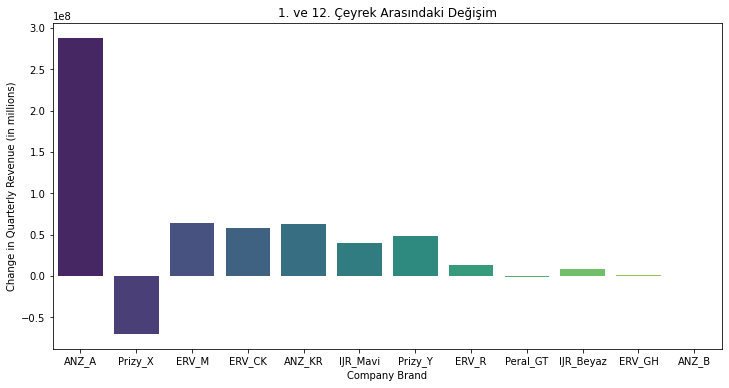

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_rank_start["Company_Brand"], y=df_diff, palette="viridis")
plt.title("1. ve 12. Çeyrek Arasındaki Değişim")
plt.xlabel("Company Brand")
plt.ylabel("Change in Quarterly Revenue (in millions)")
plt.show()

### 1. KATEGORİDE PİYASAYA GİRDİĞİ 1. ÇEYREKTE EN YÜKSEK PAZAR PAYINDA 7. SIRADA İKEN 12. ÇEYREKTE YİNE 7. SIRADA OLDUĞUNU GÖRÜYORUZ

In [22]:
print("1. Çeyrekte, 1. Kategorideki toplam Volume = {}".format(df_rank_start["1.0. Çeyreklik"].sum()))
print("12. Çeyrekte, 1. Kategorideki toplam Volume = {}".format(df_rank_end["12.0. Çeyreklik"].sum()))

1. Çeyrekte, 1. Kategorideki toplam Volume = 2007356452.2390327
12. Çeyrekte, 1. Kategorideki toplam Volume = 2519812713.1420817


### 11. Çeyrekteki sıçrama görüntüsüne rağmen elimizdeki sonuçlar bize bu sıçramanın markanın başarısından çok markanın büyüyen pazardan payını almış olduğunu gösteriyor.

### Öncelikle Prizy Y markasına odaklanıp market payının diğer değişkenler ile ilişkisini inceliyoruz. Daha sonra market ortalamalarını alıp Prizy Y markasının market hareketleriyle arasındaki ilişkiyi inceleyebiliriz.

In [23]:
mean_tom = []
for i in df_1[(df_1["Metric"] == "TOM") & (df_1["Kategori"] == 1)].columns[5:-1]:
    mean_tom.append(df_1[(df_1["Metric"] == "TOM") & (df_1["Kategori"] == 1)][i].mean())
    
mean_volume = []
for i in df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].columns[5:-1]:
    mean_volume.append(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)][i].mean())

mean_price = []
for i in df_1[(df_1["Metric"] == "Price (gr/tl)") & (df_1["Kategori"] == 1)].columns[5:-1]:
    mean_price.append(df_1[(df_1["Metric"] == "Price (gr/tl)") & (df_1["Kategori"] == 1)][i].mean())    
    
mean_barcode = []
for i in df_1[(df_1["Metric"] == "No of Sku (barcode)") & (df_1["Kategori"] == 1)].columns[5:-1]:
    mean_barcode.append(df_1[(df_1["Metric"] == "No of Sku (barcode)") & (df_1["Kategori"] == 1)][i].mean())  

mean_awareness = []
for i in df_1[(df_1["Metric"] == "Spontaneous Awareness") & (df_1["Kategori"] == 1)].columns[5:-1]:
    mean_awareness.append(df_1[(df_1["Metric"] == "Spontaneous Awareness") & (df_1["Kategori"] == 1)][i].mean())  

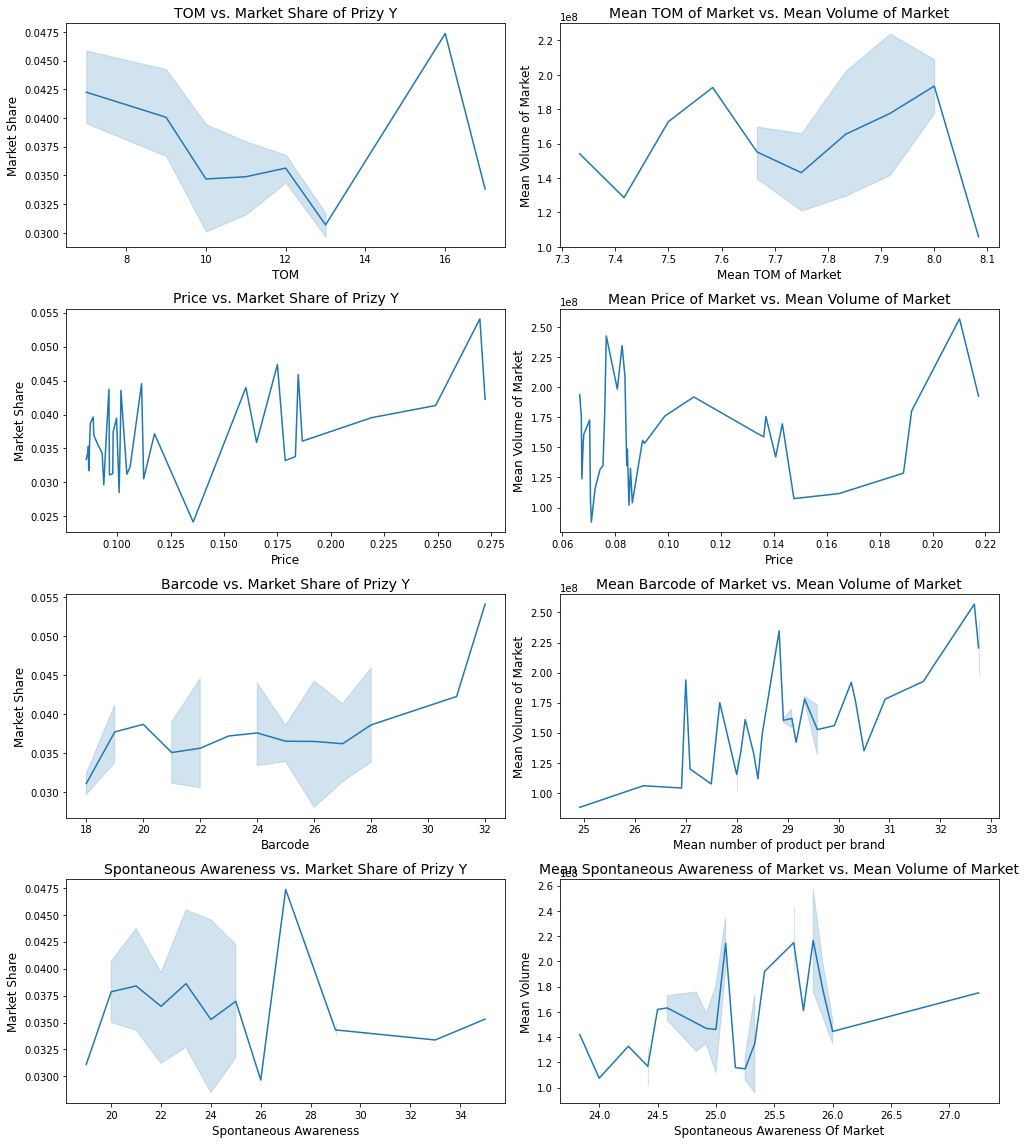

In [24]:
total = []
for i in df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].columns[5:-1]:
    total.append(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)][i].sum())

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

sns.lineplot(x=df_1[(df_1["Metric"] == "TOM") & (df_1["Kategori"] == 1)].loc[1][5:-1],
             y=(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].loc[13][5:-1]) / total,
             ax=axs[0][0])
axs[0][0].set_xlabel("TOM", fontsize=12)
axs[0][0].set_ylabel("Market Share", fontsize=12)
axs[0][0].set_title("TOM vs. Market Share of Prizy Y", fontsize=14)

sns.lineplot(x=df_1[(df_1["Metric"] == "Price (gr/tl)") & (df_1["Kategori"] == 1)].loc[20][5:-1],
             y=(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].loc[13][5:-1]) / total,
             ax=axs[1][0])
axs[1][0].set_xlabel("Price", fontsize=12)
axs[1][0].set_ylabel("Market Share", fontsize=12)
axs[1][0].set_title("Price vs. Market Share of Prizy Y", fontsize=14)

sns.lineplot(x=df_1[(df_1["Metric"] == "No of Sku (barcode)") & (df_1["Kategori"] == 1)].loc[21][5:-1],
             y=(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].loc[13][5:-1]) / total,
             ax=axs[2][0])
axs[2][0].set_xlabel("Barcode", fontsize=12)
axs[2][0].set_ylabel("Market Share", fontsize=12)
axs[2][0].set_title("Barcode vs. Market Share of Prizy Y", fontsize=14)

sns.lineplot(x=df_1[(df_1["Metric"] == "Spontaneous Awareness") & (df_1["Kategori"] == 1)].loc[2][5:-1],
             y=(df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].loc[13][5:-1]) / total,
             ax=axs[3][0])
axs[3][0].set_xlabel("Spontaneous Awareness", fontsize=12)
axs[3][0].set_ylabel("Market Share", fontsize=12)
axs[3][0].set_title("Spontaneous Awareness vs. Market Share of Prizy Y", fontsize=14)

sns.lineplot(x=mean_tom,
             y=mean_volume,
             ax=axs[0][1])
axs[0][1].set_xlabel("Mean TOM of Market", fontsize=12)
axs[0][1].set_ylabel("Mean Volume of Market", fontsize=12)
axs[0][1].set_title("Mean TOM of Market vs. Mean Volume of Market", fontsize=14)

sns.lineplot(x=mean_price,
             y=mean_volume,
             ax=axs[1][1])
axs[1][1].set_xlabel("Price", fontsize=12)
axs[1][1].set_ylabel("Mean Volume of Market", fontsize=12)
axs[1][1].set_title("Mean Price of Market vs. Mean Volume of Market", fontsize=14)

sns.lineplot(x=mean_barcode,
             y=mean_volume,
             ax=axs[2][1])
axs[2][1].set_xlabel("Mean number of product per brand", fontsize=12)
axs[2][1].set_ylabel("Mean Volume of Market", fontsize=12)
axs[2][1].set_title("Mean Barcode of Market vs. Mean Volume of Market", fontsize=14)

sns.lineplot(x=mean_awareness,
             y=mean_volume,
             ax=axs[3][1])
axs[3][1].set_xlabel("Spontaneous Awareness Of Market", fontsize=12)
axs[3][1].set_ylabel("Mean Volume", fontsize=12)
axs[3][1].set_title("Mean Spontaneous Awareness of Market vs. Mean Volume of Market", fontsize=14)

plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.tight_layout()
plt.show()

In [25]:
mean_stats_of_market = pd.DataFrame({'Mean Awareness': mean_awareness,
                           'Mean Barcode': mean_barcode,
                           'Mean Price': mean_price,
                           'Mean TOM': mean_tom,
                           'Mean Volume': mean_volume})

mean_stats_of_prizy_y = pd.DataFrame({"Spontaneous Awareness " : df_1[(df_1["Metric"] == "Spontaneous Awareness") & (df_1["Kategori"] == 1)].loc[2][5:-1],
                                     "Barcode " : df_1[(df_1["Metric"] == "No of Sku (barcode)") & (df_1["Kategori"] == 1)].loc[21][5:-1],
                                    "Price ": df_1[(df_1["Metric"] == "Price (gr/tl)") & (df_1["Kategori"] == 1)].loc[20][5:-1],
                                     "TOM" : df_1[(df_1["Metric"] == "TOM") & (df_1["Kategori"] == 1)].loc[1][5:-1],
                                     "Market Share ": df_1[(df_1["Metric"] == "Volume (gr)") & (df_1["Kategori"] == 1)].loc[13][5:-1] / total})
mean_stats_of_prizy_y.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, '1. Kategoride Market Değerlerinin Korelasyonları')

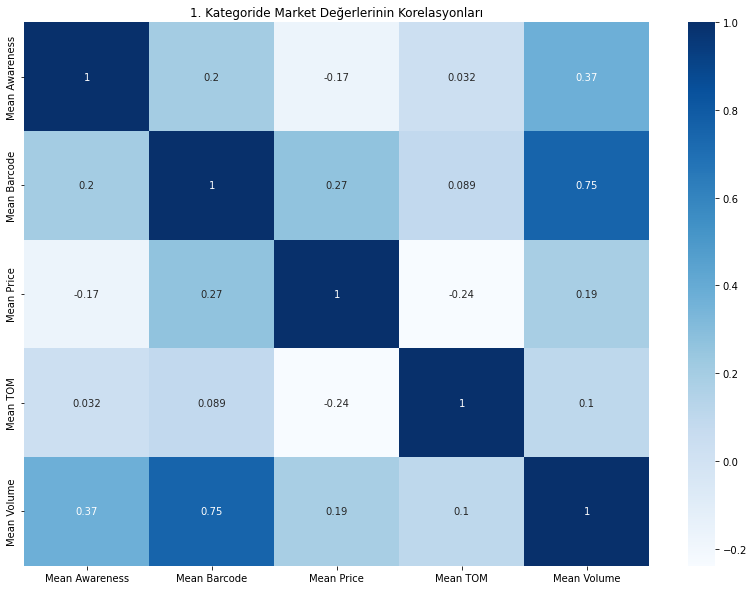

In [26]:
plt.figure(figsize = (14,10))
sns.heatmap(mean_stats_of_market.corr(),annot = True,cmap="Blues")
plt.title("1. Kategoride Market Değerlerinin Korelasyonları")

Text(0.5, 1.0, 'Prizy Y Ürününün Değişkenlerinin Korelasyonları')

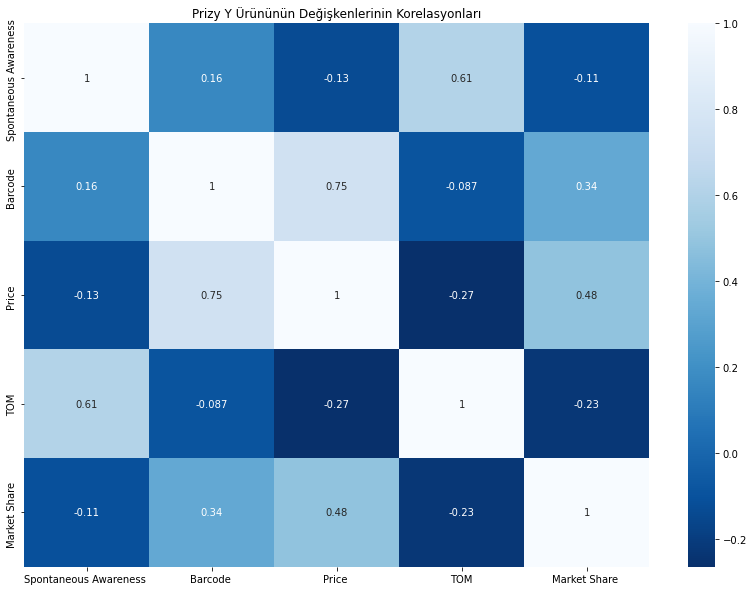

In [27]:
plt.figure(figsize = (14,10))
sns.heatmap(mean_stats_of_prizy_y.astype(float).corr(),annot = True,cmap="Blues_r")
plt.title("Prizy Y Ürününün Değişkenlerinin Korelasyonları")